In [1]:
!pip install matplotlib pandas numpy

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
results_file = 'results.json'
results = pd.read_json(results_file)

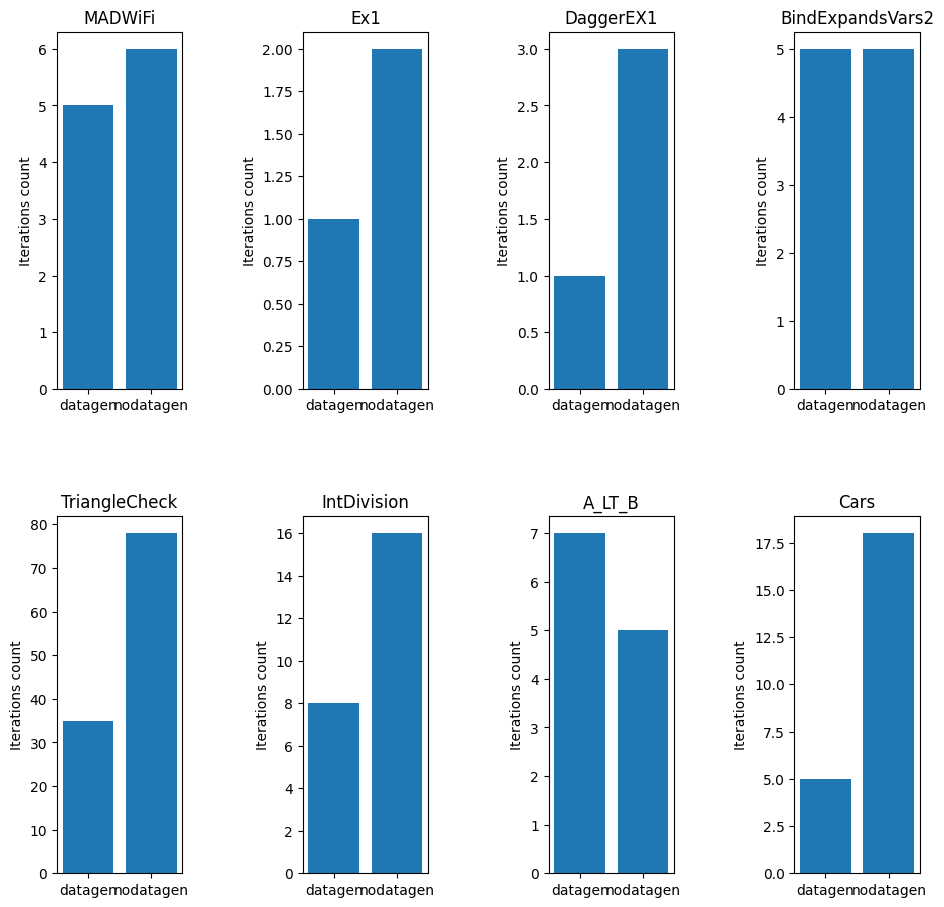

In [4]:
# for every benchmark, plot the iterations count and time for both datagen and nodatagen
# as a bar chart. Make 2 graphs, one for iterations count, and another one for time taken.
# Draw all of these in a single graph.
rows = 2
cols = 4
fig, axs = plt.subplots(rows, cols)
count = 0
for benchmark in results:
    datagen_iterations = results[benchmark]['datagen_iterations']
    nodatagen_iterations = results[benchmark]['nodatagen_iterations']
    
    axs[count//cols, count%cols].bar(['datagen', 'nodatagen'], [datagen_iterations, nodatagen_iterations])
    axs[count//cols, count%cols].set_title(benchmark)
    axs[count//cols, count%cols].set_ylabel('Iterations count')
    
    count += 1
   
fig.tight_layout() 
fig.set_figheight(10)
fig.set_figwidth(10)
plt.show()

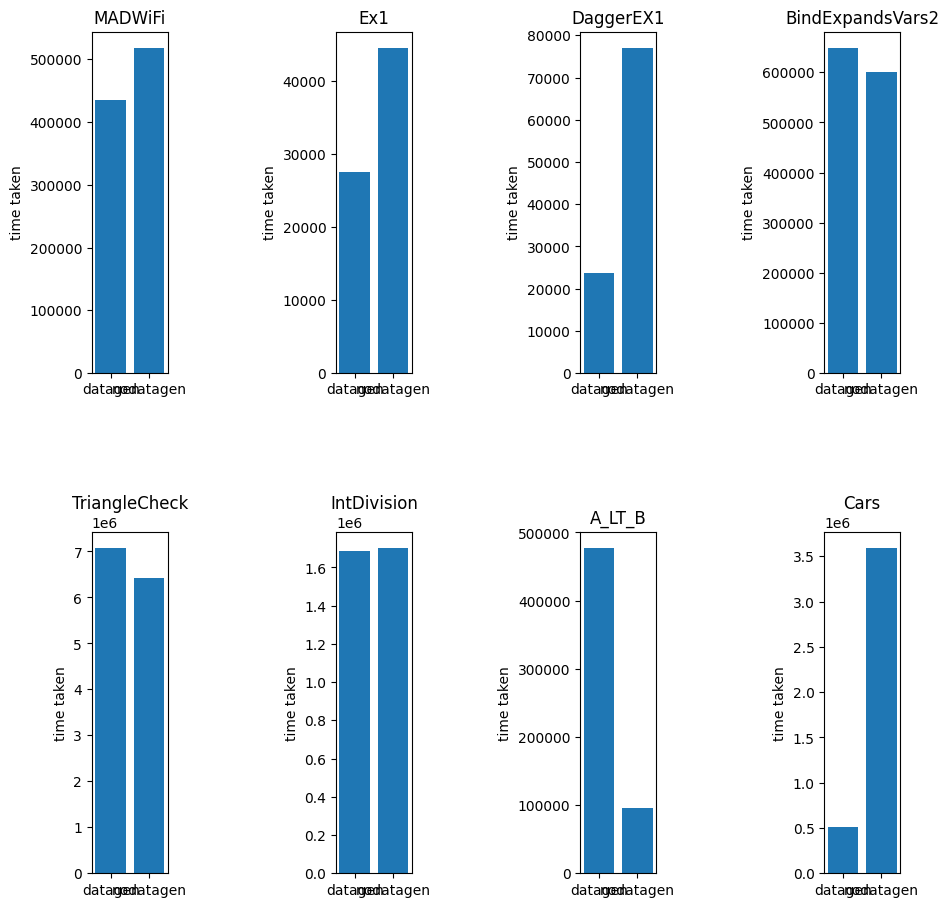

In [5]:
# for every benchmark, plot the iterations count and time for both datagen and nodatagen
# as a bar chart. Make 2 graphs, one for iterations count, and another one for time taken.
# Draw all of these in a single graph.
rows = 2
cols = 4
fig, axs = plt.subplots(rows, cols)
count = 0
for benchmark in results:
    datagen_time = results[benchmark]['datagen_time']
    nodatagen_time = results[benchmark]['nodatagen_time']
    
    axs[count//cols, count%cols].bar(['datagen', 'nodatagen'], [datagen_time, nodatagen_time])
    axs[count//cols, count%cols].set_title(benchmark)
    axs[count//cols, count%cols].set_ylabel('time taken')
    
    count += 1
   
fig.tight_layout() 
fig.set_figheight(10)
fig.set_figwidth(10)
plt.show()

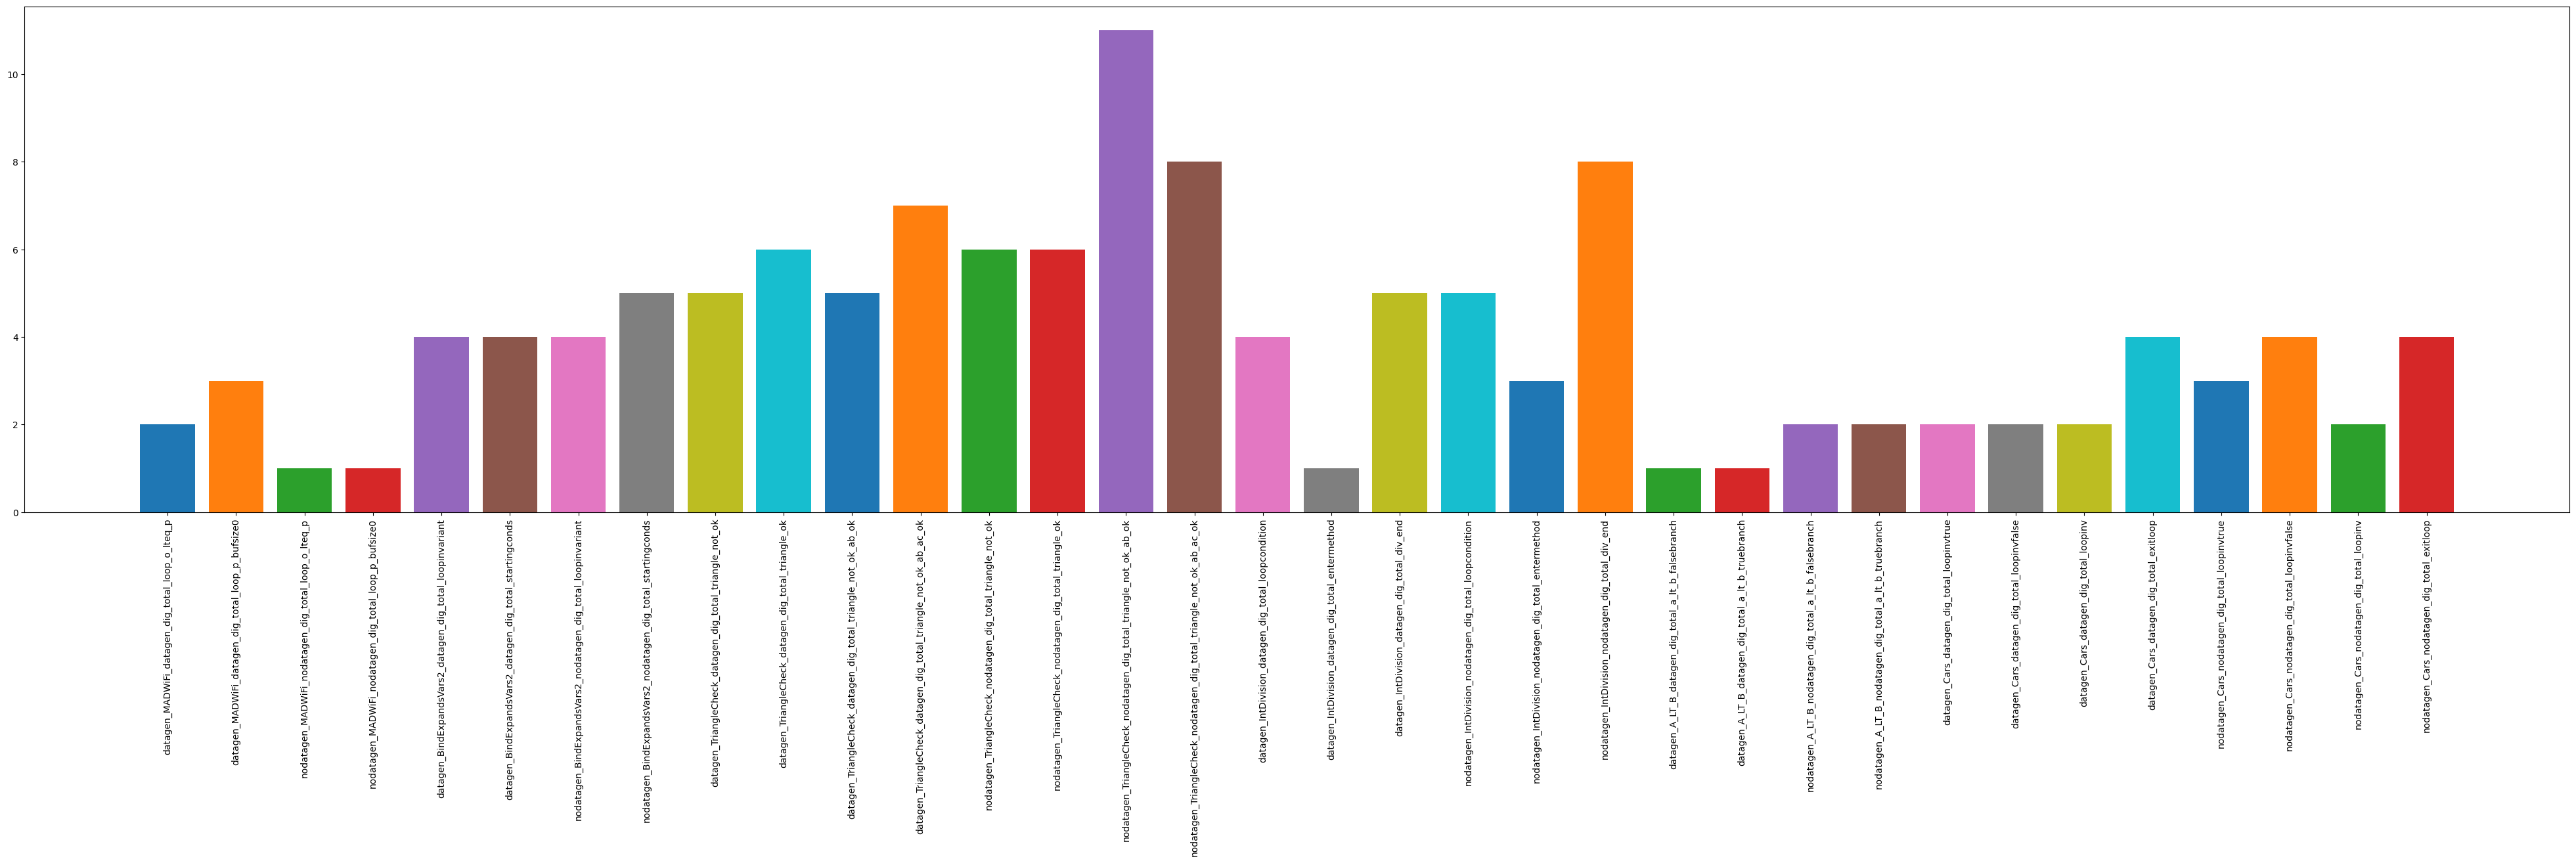

In [6]:
# Plot deleted invariants count for each benchmark.
fig, ax = plt.subplots()
plt.xticks(rotation=90)
for benchmark in results:
    for (key, value) in results[benchmark].items():
        if key.startswith("datagen_dig_total") and value >= 1:
            ax.bar("datagen" + "_" + benchmark + "_" + key, value)
        if key.startswith("nodatagen_dig_total") and value >= 1:
            ax.bar("nodatagen" + "_" + benchmark + "_" + key, value)
fig.set_figheight(10)
fig.set_figwidth(50)
plt.show()

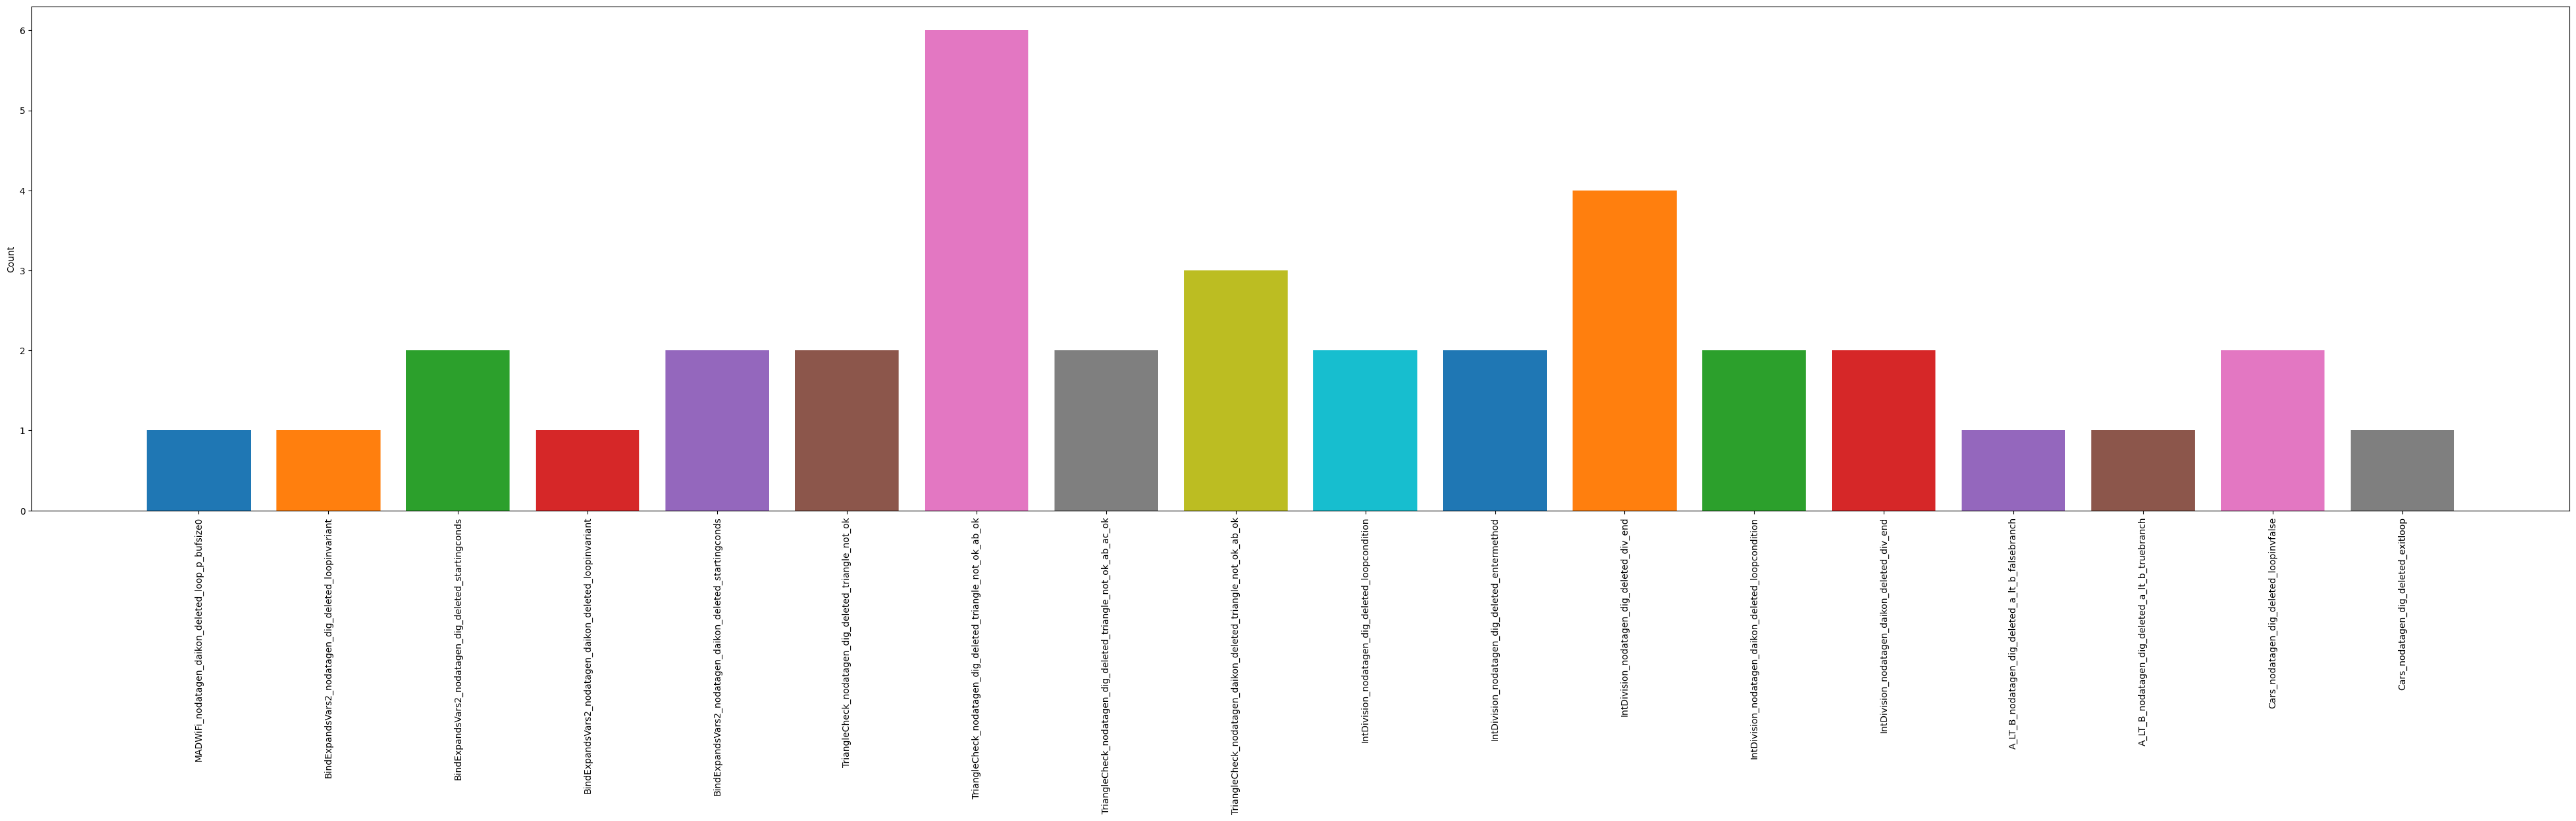

Nodatagen deleted invariants count:  37.0


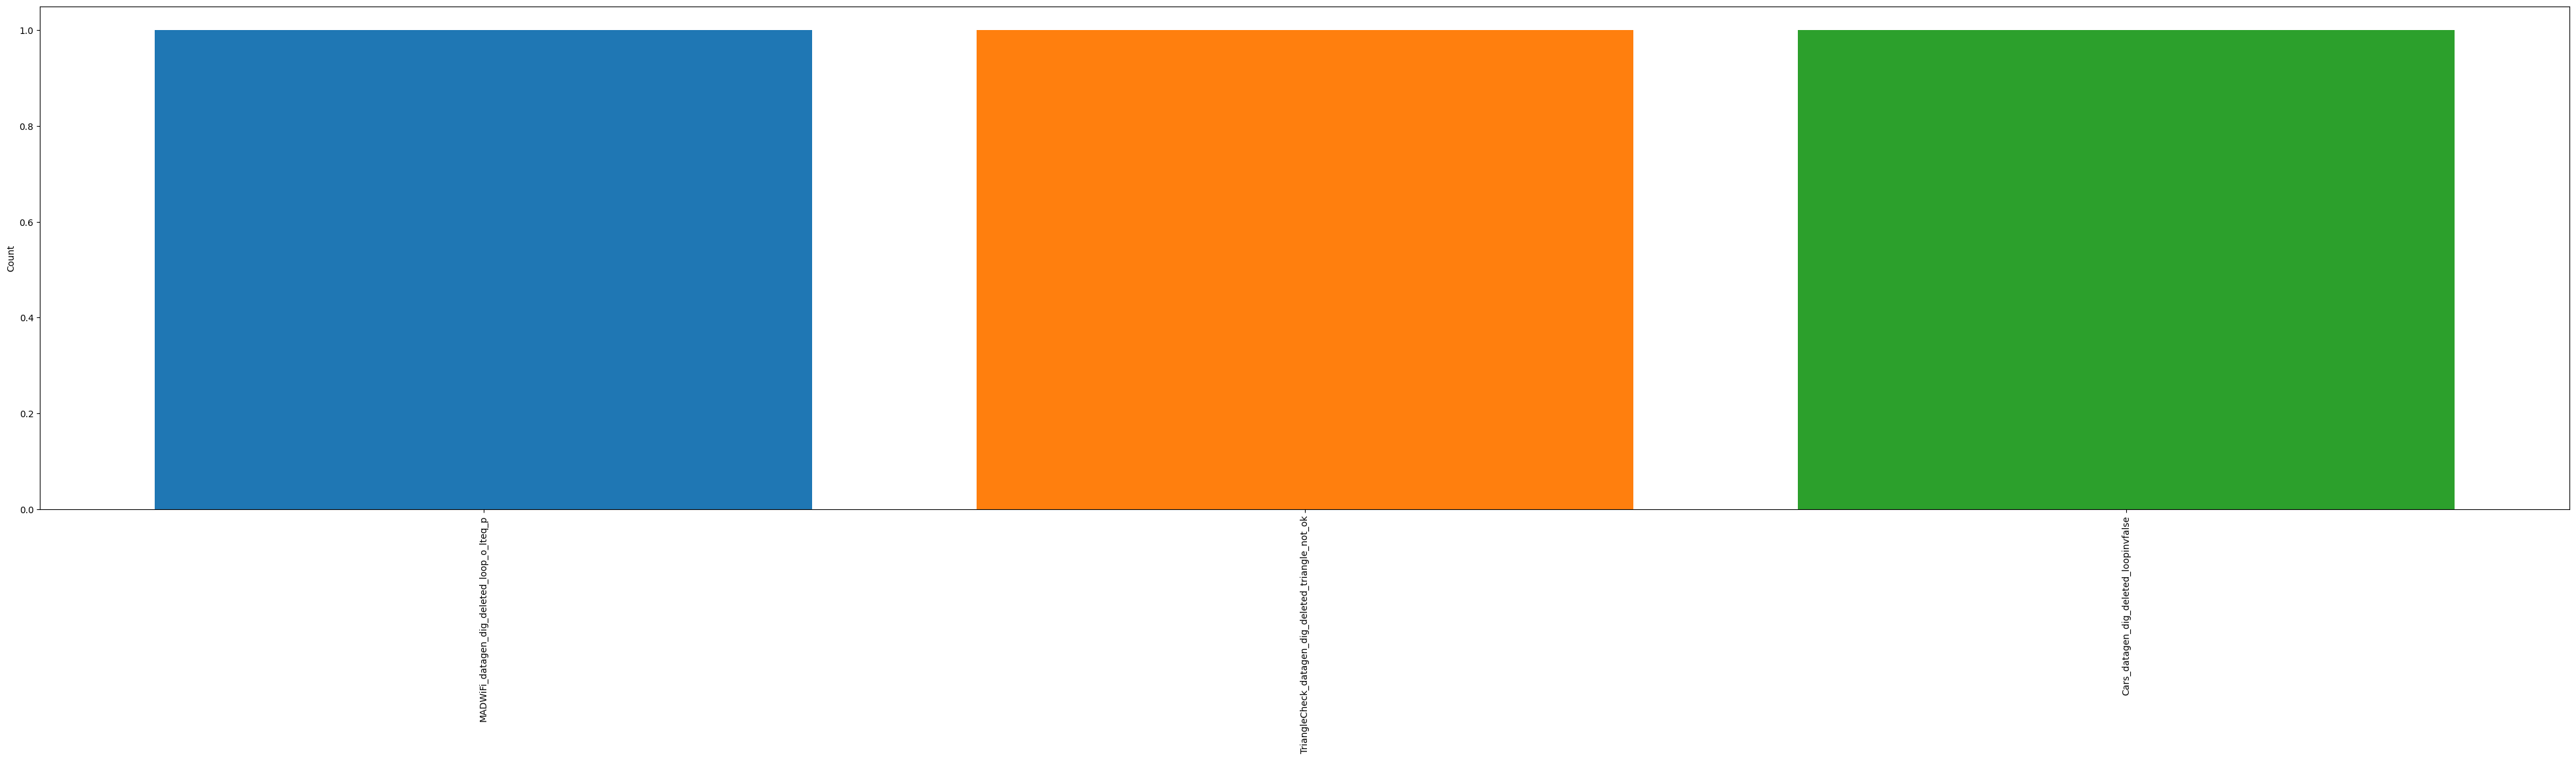

Datagen deleted invariants count:  3.0


In [9]:
fig, ax = plt.subplots()
plt.xticks(rotation=90)
total_deleted = 0
for benchmark in results:
    for (key, value) in results[benchmark].items():
        if (key.startswith("nodatagen_dig_deleted") and value >= 1) or (key.startswith('nodatagen_daikon_deleted') and value >= 1):
            total_deleted += value
            ax.bar(benchmark + "_" + key, value)
            ax.set_ylabel('Count')
fig.set_figheight(10)
fig.set_figwidth(50)
plt.show()
print("Nodatagen deleted invariants count: ", total_deleted)

total_deleted = 0
fig, ax = plt.subplots()
plt.xticks(rotation=90)
for benchmark in results:
    for (key, value) in results[benchmark].items():
        if (key.startswith("datagen_dig_deleted") and value >=1) or (key.startswith('datagen_daikon_deleted') and value >= 1):
            total_deleted += value
            ax.bar(benchmark + "_" + key, value)
            ax.set_ylabel('Count')
fig.set_figheight(10)
fig.set_figwidth(50)
plt.show()
print("Datagen deleted invariants count: ", total_deleted)